<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Training and Tuning

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a summary of **Machine Learning Training and Tuning** including essential concepts:

* Model Parameter Training and Hyperparameter Tuning
* Model Goodness Metrics
* Cross Validation Workflows
* Limitations of Cross Validation
  
**YouTube Lecture**: check out my lectures on:

* [Training and Testing](https://youtu.be/owOSiKT3K8E?si=PrY5lL4Dbi2Ix7fu).
* [Model Goodness Metrics](https://youtu.be/g38sEpFOX-0?si=XPC18zNMCxaIZCOF)
* [Cross Validation Considerations](https://youtu.be/FiX8IWPhTcg?si=K4A3W0zTaiypm7n7)

For your convenience here's a summary of salient points.

#### Model Parameter Training and Hyperparameter Tuning

For predictive machine learning, we commonly apply a general model training and testing workflow that is illustrated here.

<figure style="text-align: center;">
  <img src="_static/concepts/ML_workflow.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Standard predictive machine learning modeling workflow.</figcaption>
</figure>

Let's walk through the steps,

1. **Train and Test Split** the available data into train and test mutually exclusive, exhaustive subsets. Typically 15% - 30% of the data are withheld and assigned to test and the remainder to the train.
   
2. **Remove the Test Split** from the analysis. The test data cannot be used to train the predictive model. Any information from test data to inform the model training is considered information leakage and compromises the accuracy of the model.
   
3. **Train a Very Simple Model** with the training data. Set the hyperparameters such that the model is as simple as reasonable and then train the model parameters with the available training data.

4. **Train Models from Simple to Complicated** by repeating the previous steps with the model hyperparameters incrementally increasing the model complexity. The result is a suite of models of variable complexity all with model parameters trained to minimize misfit with the training data.

5. **Access Performance with the Withheld Testing Data** by retrieving the testing data and summarizing the error over all these withheld data.

6. **Select the Hyperparameter(s)** that minimize the testing error by picking the model from the previous step with the minimum testing error. The associated hyperparameter(s) are known as the tuned hyperparameter(s).

7. **Retrain the Model** with all of the data (train and test combined) with the tuned hyperparameter(s).

Let's answer a couple of common questions to better explain this general predictive machine learning training and tuning workflow,

**What is the outcome from the empirical approach expressed in steps 1 through 6?** - just the tuned hyperparameter(s). We would never deploy the selected model in step 6 as it would omit valuable data used for testing. In step 7 we retrain with all the data and the tuned hyperparameter(s) before model deployment.

**Why not just train the model with all of the data?** - We can always minimize the training error by selecting hyperparameters that result in a very complicated model. More complicated models are more flexible, and with enough flexibility will be able to perfectly fit all of the training data, but that model would not do a very good job with making predictions for predictor feature cases away from the training cases. The most complicated, overfit model would always win.

In other words, this approach is an attempt to simulate the model use, a form of model dress rehearsal, to find the level of model complexity that does the best job making new predictions, known as model generalization. Now we can review the definitions of and differences between model parameters and hyperparameters.

#### Model Parameters and Model Hyperparameters

Model parameters are fit during training phase to minimize error at the training data, i.e., 

* model parameters are trained with training data and control model fit to the data.

For the polynomial predictive machine learning model from the machine learning workflow example above, the model parameters are the polynomial coefficients, e.g., $b_3$, $b_2$, $b_1$ and $c$ (often called $b_0$) for the third order polynomial model.

<figure style="text-align: center;">
  <img src="_static/concepts/parameters.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;">Model parameters are adjusted to fit of the model to the data, i.e., model parameters are trained to minimize error over the training data (x markers).</figcaption>
</figure>

Model hyperparameters are very different. They do not constrain the model fit to the data directly, instead they constrain the model complexity and flexibility.

* model hyperparameters are selected, i.e., tuned, to minimize error over the withheld testing data.

Going back to our polynomial predictive machine learning example, the choice of polynomial order is the model hyperparameter. 

<figure style="text-align: center;">
  <img src="_static/concepts/hyperparameters.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Model hyperparameters are adjusted to change the model complexity / flexibility, i.e., model hyperparameters are tuned to minimize error over the withheld testing data (solid circles).</figcaption>
</figure>

#### Regression and Classification

Since our model goodness metrics will not be the same for regression and classification models, it may be helpful to review their definitions, 

* **Regression Model** - a predictive machine learning model where the response feature(s) is continuous.

* **Classification Model** - a predictive machine learning model where the response feature(s) is categorical.

#### Training and Testing Data

For clarity, consider this is schematic of the flow of training and testing data in the predictive machine learning model parameter training and hyperparameter tuning workflow,

<figure style="text-align: center;">
  <img src="_static/training_tuning/traintestdata.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">The flow of training and testing data in the predictive machine learning model parameter training and hyperparameter tuning workflow.</figcaption>
</figure>

**Training Data**,
  
* trains model parameters

* trains the final model for real world use

**Testing Data**,

* withheld from training model parameters to avoid model overfit

* tunes model hyperparameters

* returned to train the final tuned model for deployment

#### How Much Data Should be Withheld for Testing?

The proportion in testing is recommended by various sources from 15% - 30% of the total dataset. This is a compromise,

* data withheld for testing reduces the data available for training; therefore, reduces the accuracy of the model.

* data withheld for testing improves the accuracy of the assessment of the model performance.

Various authors have experimented on a variety of training and testing ratios and have recommended splits for their applications, 

* the optimum ratio of training and testing split depends on problem setting

To determine the proportion of testing data to withheld we could consider the difficulty in model parameter training (e.g., the number of model parameters) and the difficulty in model hyperparameter tuning (e.g., number of hyperparameters, range of response feature outcomes).

#### Fair Train and Test Splits

Dr. Julian Salazar suggests that for spatial prediction problems that random train and test data splits may not be fair. 

* proposed a [fair train and test split method](https://www.sciencedirect.com/science/article/pii/S0920410521015023) for spatial prediction models that splits the data based on the difficulty of the planned use of the model.

* prediction difficulty is related to kriging variance that accounts for spatial continuity and distance offset, i.e., the difficulty of the estimate.

* the testing split is iterated to match the distribution of kriging variance for planned real world use of the model 

To illustrate this concept of prediction difficulty, consider this set of well logs with both random assignment of testing data and withholding an entire contiguous region of the well log for testing data. 

* **easy prediction problem** - for random assignment, usually training data are available very close and very similar to the withheld testing data

* **difficult prediction problem** - for removal of the contiguous region, there are no similar nor close training data to the withheld testing data

<figure style="text-align: center;">
  <img src="_static/training_tuning/fairtraintest.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Two cases for train and test data split, random (left) and by-region (right).</figcaption>
</figure>

Consider the following prediction cases, i.e., planned real world use of the models, and some practical suggestions for fair train and test split.

1. If the model will be used to impute data with small offsets from available data then construct a train and test split with train data close to test data - random assignment of withheld testing data is likely sufficient.
  
2. if the model will be used to predict a large distance offsets then perform splits the result is large offsets between train and test data - withhold entire wells, drill holes or spatial regions.

* Note, with fair train and test splits the tuned model may vary based on the planned use for the model. 

Use a simple method like withholding entire wells for a predrill prediction model, or use the Dr. Salazar workflow, but don't ignore this issue and just use random selection by default.

* admittedly, throughout this e-book for demonstration workflow brevity and clarity I have just used random training and testing data assignments.


#### Model Metrics

Since we have covered the workflows for training and tuning, now we can specify the model metrics that are applied for,

* training model parameters

* tuning model hyperparameters

* model checking and comparison

Here's an flowchart indicating how these metrics fit into the machine learning modeling workflow.

<figure style="text-align: center;">
  <img src="_static/training_tuning/metrics.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Various applications for model metrics in machine learning modeling workflows.</figcaption>
</figure>

Choice of model metric depends primarily on the context of the prediction problem,

* classification vs. regression

* individual estimates vs. entire subsets in space (images) or time (signals)

* estimation vs. uncertainty  

There are additional considerations, for example,

* $L^1$ vs $L^2$ norms with their differences, for example, in robustness with outliers, stability of solutions and solution sparsity

* consistency with model assumptions, for example, $r^2$ is only valid for linear models

Let's review some of the common model metrics for regression models and then for classification models. 


#### Mean Square Error (MSE) 

Is sensitive to outliers, but is continuously differentiable, leading to a closed-form expression for model training. Since the error is squared the error units are squared and this may be less interpretable, for example, MSE of 23,543 $mD^2$. The equation is, 

$$
\text{Test MSE} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (y_i - \hat{y}_i)^2 = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (\Delta y_i)^2
$$

#### Mean Absolute Error (MAE) 

Is robust in the presence of outliers, but is not continuously differentiable; therefore, there is no closed-form expression for model training and training is generally accomplished by iterative optimization. The equation is,

$$
\text{Test MAE} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} |y_i - \hat{y}_i| = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} |\Delta y_i|
$$

#### Variance Explained

The proportion of variance of the response feature captured by the model. Assumes additivity of variance; therefore, we only use this model metric for linear models.

First we calculate the variance explained by the model, simply as the variance of the model predictions,

$$
\sigma_{\text{explained}}^2 = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} ( \hat{y}_i - \bar{y} )^2
$$

then we calculate the variance not explained by the model as the variance of the error over the model predictions,

$$
\sigma_{\text{not explained}}^2 = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (y_i - \hat{y}_i)^2
$$

then under the assumption of additivity of variance, we calculate the ratio of variance explained over all variance, variance explained plus variance not explained,

$$
r^2 = \frac{\sigma_{\text{explained}}^2}{\sigma_{\text{explained}}^2 + \sigma_{\text{not explained}}^2} = \frac{\sigma_{\text{explained}}^2}{\sigma_{\text{total}}^2}
$$

For linear regression, recall $r^2 =  \left( \rho_(X,y) \right)^2$; therefore, like correlation coefficients, $r^2$,

* has similar issues as correlation with respect to outliers and mixing multiple populations, e.g., Simpson’s Paradox

* for nonlinear models consider pseudo-R-square methods

Also, even a linear model can have a negative $r^2$ if the model trend contradicts the data trend, for example, if you fit data with a negative slope with a linear model with a positive slope!

#### Inlier Ratio 

The proportion of testing data, $y_i$ within a margin, $\epsilon$, of the model, $\hat{y}_i$, calculated as,

$$ 
I_R = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} I(y_i, \hat{y}_i)
$$

where the indicator transform, $I_R$ is defined as,

$$ 
I(y_i, \hat{y}_i) = 
\begin{cases} 
1, & \text{if } |y_i - \hat{y}_i| \leq \epsilon \\
0, & \text{otherwise}
\end{cases} 
$$

Here's an illustration of the inlier ratio model metric, $I_R$ model metric,

<figure style="text-align: center;">
  <img src="_static/training_tuning/inliers.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Testing data, model with margin, \(\epsilon\), and outliers (white) and inliers (red) identified, 16 inliers out of 25 data samples, \(𝐼𝑅 = 0.64\). </figcaption>
</figure>

While the illustration is a linear model, this metric may be applied to any model. Although there is some subjectivity with the inlier ratio model metric, 

* what is the best selection for the margin, $\epsilon$?

#### Common Classification Model Metrics

Let's review some of the common model metrics for classification models. Classification is potentially more complicated than regression, since instead of a single model metric, we actually calculate an entire confusion matrix,

* a $K \times K$ matrix with frequencies of predicted (x axis) vs. actual (y axis) categories to visualize the performance of a classification model, where $K$ is the response feature cardinality, i.e., the number of possible categories

* visualize and diagnose all the combinations of correct and misclassification with the classification model, for example, category 1 is often misclassified as category 3,

<figure style="text-align: center;">
  <img src="_static/training_tuning/confusion.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;">Example confusion matrix for a classification model, 2D matrix with the frequencies of all cases of truth and predicted categories. </figcaption>
</figure>

* perfect accuracy is number of each class, $n_1, n_2, \ldots, n_K$ on the diagonal, i.e., category 1 is always predicted as category 1, etc.

<figure style="text-align: center;">
  <img src="_static/training_tuning/perfect_confusion.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;">Example confusion matrix for perfectly accurate classification model. </figcaption>
</figure>

* the confusion matrix is applied to calculate a single summary of categorical accuracy, for example, precision, recall, etc.

* model metrics are specific to the specific category and may significantly vary over categories, i.e., we can predict well for category $k=1$ but not for category $k=3$.

#### Precision

For category $𝑘$, precision is the ratio of true positive over all positives,

$$ 
\text{Precision}_k = \frac{n_{k \text{ true positive}}}{n_{k \text{ true positive}} + n_{k \text{ false positive}}} = \frac{\text{true positive}}{\text{all positives}}
$$

we can intuitively describe precision as the conditional probability, 

$$
\text{Precision}_k = P \left(k \text{ is happening} \mid \text{model says } k \text{ is happening}\right) 
$$

<figure style="text-align: center;">
  <img src="_static/training_tuning/precision.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Example confusion matrix with illustration of the precision model metric for each category, \(k\).</figcaption>
</figure>

For this example, we can calculate the precision for each category as,

* Category k=1

$$ 
\text{Precision}_{k=1} = \frac{15}{15 + (5 + 7)} = \frac{15}{27} = 0.56 
$$

* Category k = 2,

$$ 
\text{Precision}_{k=2} = \frac{22}{22 + (15 + 15)} = \frac{22}{52} = 0.42 
$$

* Category k = 3,
 
$$ 
\text{Precision}_{k=3} = \frac{4}{4 + (2 + 9)} = \frac{4}{15} = 0.27 
$$

#### Recall (called sensitivity in medical)

Recall for group $𝑘$ is the ratio of true positives over all cases of $𝑘$. 

$$
\text{Recall}_k = \frac{n_{k \text{ true positive}}}{n_{k \text{ true positive}} + n_{k \text{ false negative}}}
$$

We can intuitively describe recall as, how many of group 𝑘 did we catch? 

* Note, recall does not account for false positives.

<figure style="text-align: center;">
  <img src="_static/training_tuning/recall.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Example confusion matrix with illustration of the recall model metric for each category, \(k\). </figcaption>
</figure>

For this example, we can calculate the recall for each category as,

* Category k=1

$$ 
\text{Recall}_{k=1} = \frac{15}{15 + (15 + 2)} = \frac{15}{32} = 0.47 
$$

* Category k = 2,

$$ 
\text{Recall}_{k=2} = \frac{22}{22 + (5 + 9)} = \frac{22}{36} = 0.61 
$$

* Category k = 3,
 
$$ 
\text{Recall}_{k=3} = \frac{4}{4 + (7 + 15)} = \frac{4}{26} = 0.15 
$$

#### Specificity

Specificity for group $𝑘$ is the ratio of true negatives over all negative cases of $n \ne 𝑘$. 

$$ 
\text{Specificity}_k = \frac{n_{k \text{ true negative}}}{n_{\neq k} \, n_{k \text{ true negative}} + n_{k \text{ false positive}}} 
$$

We can intuitively describe specificity as, how many of not group $k$ did we catch? 

* Note, recall does not account for true positives.

<figure style="text-align: center;">
  <img src="_static/training_tuning/recall.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Example confusion matrix with illustration of the recall model metric for each category, \(k\). </figcaption>
</figure>

For this example, we can calculate the recall for each category as,

* Category k=1

$$
\text{Specificity}_{k=1} = \frac{22 + 9 + 15 + 4}{(22 + 9 + 15 + 4) + (5 + 7)} = \frac{50}{62} = 0.81 
$$

* Category k = 2,

$$
\text{Specificity}_{k=2} = \frac{15 + 2 + 7 + 4}{(15 + 2 + 7 + 4) + (15 + 15)} = \frac{28}{58} = 0.48 
$$

* Category k = 3,
 
$$
\text{Specificity}_{k=3} = \frac{15 + 15 + 5 + 22}{(15 + 15 + 5 + 22) + (2 + 9)} = \frac{57}{68} = 0.84
$$

#### f1-score

f1-score is the harmonic mean of precision and recall for each $k$ category,

$$ 
\text{F1-Score}_k = \frac{2}{\frac{1}{\text{Precision}_k} + \frac{1}{\text{Recall}_k}} 
$$

The idea is to combine precision and recall into a single metric since they both see different aspects of the classification model accuracy.

* the harmonic mean is sensitive the to lowest score; therefore, good performance in one score cannot average out or make up for bad performance in the other

#### Train and Test Hold Out Cross Validation

If only one train and test data split is applied to tune our machine learning model hyperparameters then we are applying the hold out cross validation approach. 

* we split the data into training and testing data, these are exhaustive and mutually exclusive groups.

* but this cross validation method is not exahustive, we only consider the one split for testing, most data are not tested. Also, we do not explore the full combinatorial of possible splits (more about this as we compare with other cross validation methods)

<figure style="text-align: center;">
  <img src="_static/training_tuning/test.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;">The train and test data hold out cross validation.</figcaption>
</figure>

The workflow is, 

1. withhold the testing data subset from model training
  
2. train models with the remaining training data with various hyperparameters representing simple to complicated models 

3. then test the suite of simple to complicated trained models with withheld testing data

4. select the model hyperparameters (complexity) with lowest testing error

5. retrain the model with the turned hyperparameters and all of the data for deployment

The advantage of this approach is that we can readily evaluate the training and testing data split. 

* since there is only one split, we can easily visualize and evaluate the train and test data cases, coverage and balance

The disadvantage is that this method may be sensitive to the specific selection of testing data

* as a result hold out cross validation may result in a noisy plot of testing error vs. the hyperparameter

#### Train, Validate and Test Hold Out Cross Validation

There is a more complete hold out cross validation workflow commonly applied, 

1. **Train with training data split** - models sees and learns from this data to train the model parameters.

2. **Validate with the validation data split** - evaluation of model complexity vs. accuracy with data withheld from model parameter training to tune the model hyperparameters. The same as testing data in train and test workflow.

3. **Test model performance with testing data** - data withheld until the model is complete to provide a final evaluation of model performance.  This data had no role in building the model and is commonly applied to compare multiple competing models.

<figure style="text-align: center;">
  <img src="_static/training_tuning/validation.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">The train, validate and test hold out cross validation.</figcaption>
</figure>

I understand the motivation for the training, validation and testing cross validation workflow. It is an attempt to check our models, objectively, with cases that,

* we know the truth and can access accuracy accurately

* had nothing to do with the model construction, training model parameters nor tuning model hyperparameters

I appreciate this, but I have some concerns,

1. We are further reducing the number of samples available to training model parameters and to tuning model hyperparameters.

2. Eventually we will retrain the tuned model with all the data, so the model we test is not actually the final deployed model.

3. What do we do if the testing data is not accurately predicted? Do we include another round of testing with another withheld subset of the data? Ad infinitum?

#### Load the Required Libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [168]:
ignore_warnings = True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from sklearn.model_selection import KFold                     # K-fold cross validation
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed

#### Declare Functions

I also added a convenience function to add major and minor gridlines to improve plot interpretability.

In [143]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

#### Load Data to Demonstration Cross Validation Methods

Let's load a spatial dataset and select 2 predictor features to visualize cross validation methods.

* we will focus on the data splits and not the actual model training and tuning. Later when we cover predictive machine learning methods we will add the model component of the workflow.

In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub repository  

response = 'Prod'                                             # specify the response feature
X = df.iloc[:,[1,3]]                                          # make predictor and response DataFrames
y = df.loc[:,response]

Xname = X.columns.values.tolist()                             # store the names of the features
yname = y.name

Xmin = [6.0,1.0]; Xmax = [24.0,5.0]                           # set the minimum and maximum values for plotting
ymin = 500.0; ymax = 9000.0

Xlabel = ['Porosity','Acoustic Impedance']
ylabel = 'Normalized Initial Production (MCFPD)'

Xtitle = ['Porosity','Acoustic Impedance']
ytitle = 'Normalized Initial Production'

Xunit = ['%',r'$kg/m^3 x m/s x 10^3$']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

m = len(pred) + 1
mpred = len(pred)

#### Visualize Train and Test Hold Out Cross Validation

Let's compare the train and test with train, validate and test hold out data splits.

* first we plot a train and test data split and then a train, validate and test split. 

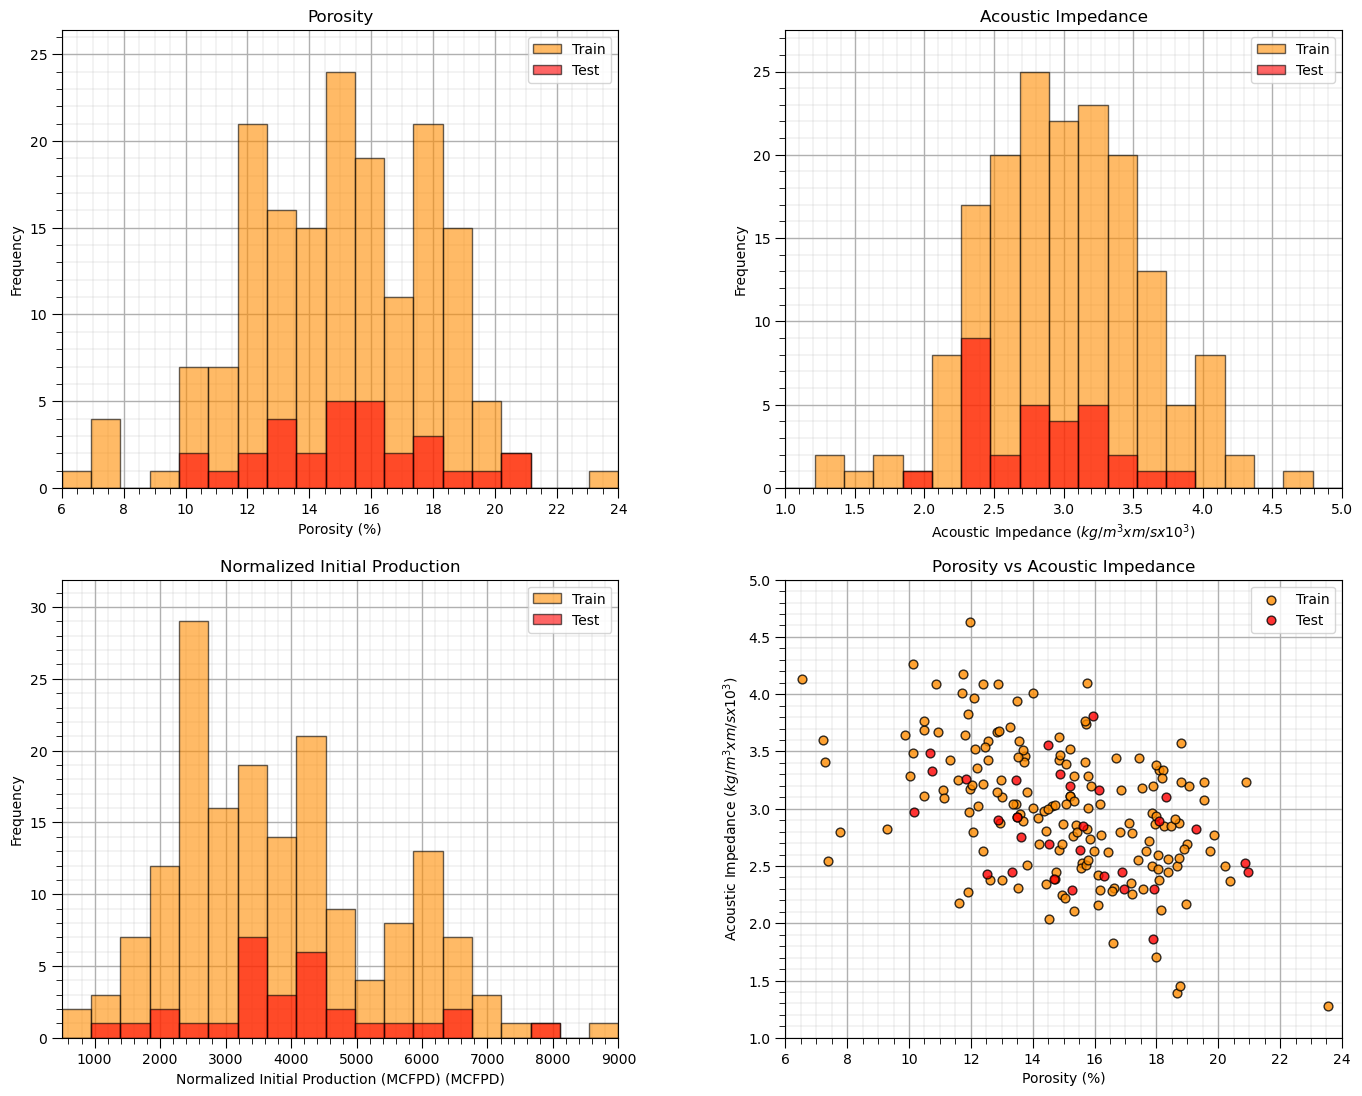

In [149]:
test_prop = 0.15                                              # set the proportion of test data to withhold
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_prop,random_state=73073) # train and test split
df_train = pd.concat([X_train,y_train],axis=1)                # make one train DataFrame with both X and y (remove all other features)
df_test = pd.concat([X_test,y_test],axis=1)                   # make one testin DataFrame with both X and y (remove all other features)

nbins = 20                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xtitle[0]); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xtitle[1]); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(ylabelunit); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(ytitle); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right')   

plt.subplot(224)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

It is a good idea to visualize the train and test split,

* histograms for each predictor feature and the response feature to ensure that the train and test cover the range of possible outcomes and are balanced

* if the number of predictor features is 2 then we can actually plot the predictor feature space to check coverage and balance of train and test data splits

Now let's repeat this for the train, validate and test data split.

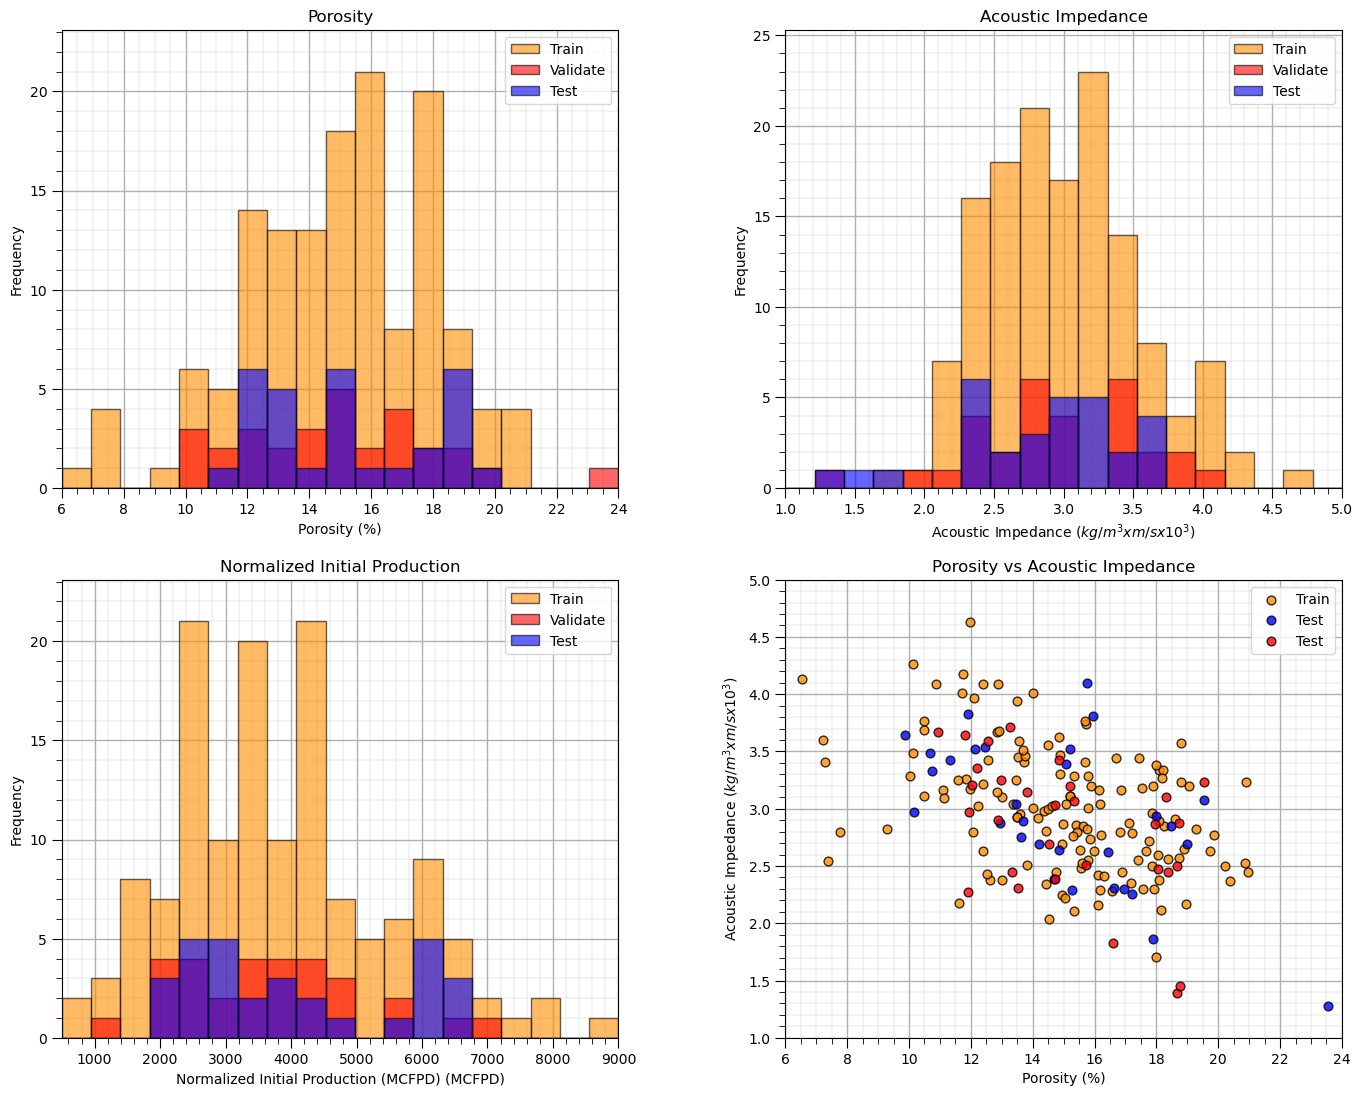

In [152]:
val_prop = 0.15; test_prop = 0.15                             # set the proportion of test data to withhold
nbins = 20                                                    # number of histogram bins

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=val_prop + test_prop, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_prop/(val_prop + test_prop), random_state=42)

df_train = pd.concat([X_train,y_train],axis=1); df_val = pd.concat([X_val,y_val],axis=1); df_test = pd.concat([X_test,y_test],axis=1) 

plt.subplot(221)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_val[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Validate')
freq3,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='blue',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10,freq3.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xtitle[0]); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_val[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Validate')
freq3,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='blue',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10,freq3.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xtitle[1]); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_val[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Validate')
freq2,_,_ = plt.hist(x=df_test[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='blue',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10,freq3.max()*1.10)
plt.xlabel(ylabelunit); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(ytitle); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right')   

plt.subplot(224)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_val[Xname[0]],df_val[Xname[1]],s=40,marker='o',color = 'blue',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again we can visualize the splits, now train, validate and test,

* histograms for each predictor feature and the response feature to ensure that the train and test cover the range of possible outcomes and are balanced

* if the number of predictor features is 2 then we can actually plot the predictor feature space to check coverage and balance of train and test data splits


#### Leave-one-out Cross Validation (LOO CV)

Leave-one-out cross validation is an exhaustive cross validation method, i.e., all data gets tested by loop over all the data.

* we train and tune $n$ models, for each model a single datum is withheld as testing and the $n-1$ data are assigned as training data

* we will calculate $n$ training and testing errors that will be aggregated over all $n$ models, for example, the average of the mean square error.

In the case of leave-one-out cross validation,

* we test at only one datum so the test error is just a single error at the single withheld datum, so we just use standard MSE over the $n$ models 

$$
\text{Test MSE Aggregate} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (y_i - \hat{y}_i)^2 = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (\Delta y_i)^2
$$

* but, we have $n-1$ training data for each model, so we aggregate, by averageing the mean square error of each model,

$$
\text{Train MSE Aggregate} = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{n-1} \sum_{i=1}^{n-1} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} \text{Train MSE}_i
$$

Here's the leave-one-out cross validation steps,

1. Loop over all $n$ data, and withhold that data 

2. Train on the remaining $n−1$ data and test on the withheld single data

3. Calculate model goodness metric, MSE for a single test data is the square error

4. Goto 1

5. Aggregate model goodness metric over all data, $n$

Typically, leave-one-out cross validation is too easy of a prediction problem; therefore, it is not commonly used, 

* but it introduces the concept of exhaustive cross validation, i.e., all data gets tested!

Leave-one-out cross validation is also exhaustive in the sense that the full combinatorial of $n$ data choose $p$ where $p=1$ are explored,

$$
\binom{n}{p} = \frac{n!}{p!(n - p)!} = \frac{n!}{1!(n - 1)!} = \frac{n!}{(n - 1)!} = n 
$$

where the full combinatorial is the $n$ models that we built above!

#### K-fold Cross Validation (k-fold CV)

K-fold is a more general, efficient and robust approach.

* a exhaustive cross validation approach (all data are tested), but it samples a limited set of the possible combinatorial of prediction problems, unlike Leave-one-out cross validation where we attempt every possible case on data withheld for testing

* for K-fold cross validation we assign a single set of K equal size splits and we loop over the splits, withholding the $k$ split for testing data and using the data outside the split for training

* the testing proportion is $\frac{1}{K}$, e.g., for $K=3$, 33.3% is withheld for testing, for $K=4$, 25% is withheld for testing and for $K=5$, 20% is withheld for testing

We call it K-fold cross validation, because each of the splits is known as a fold. Here's the steps for K-fold cross validation,

1. Select $K$, integer number of folds

2. Split the data into $K$ equal size folds
   
3. Loop over each $k = 1,\ldots,K$ fold

4. Assign the data outside the $k$ fold as training data and inside the $k$ fold as testing data

5. Train and test the prediction model and calculated the testing model metric

6. Goto 3
   
7. Aggregate testing model metric over all K folds

As you can see above k-fold cross validation is exhaustive, since all data is tested, i.e., withheld as testing data, but the method is not exhaustive in that all possible $\frac{n}{K}$ data subsets are not considered. 

To calculated the combinatorial for exhaustive K folds we used the multinomial coefficient, 

$$
\frac{n!}{\left( \frac{n}{K}! \right)^K \cdot K!}
$$

For example, if there are $n=100$ data and $K=4$ folds, there are $6.72 \times 10^55$ possible combinations. I vote that we stick with regular K-fold cross validation.

Let's visualize K-fold cross validation splits, for the case of $K=4$.

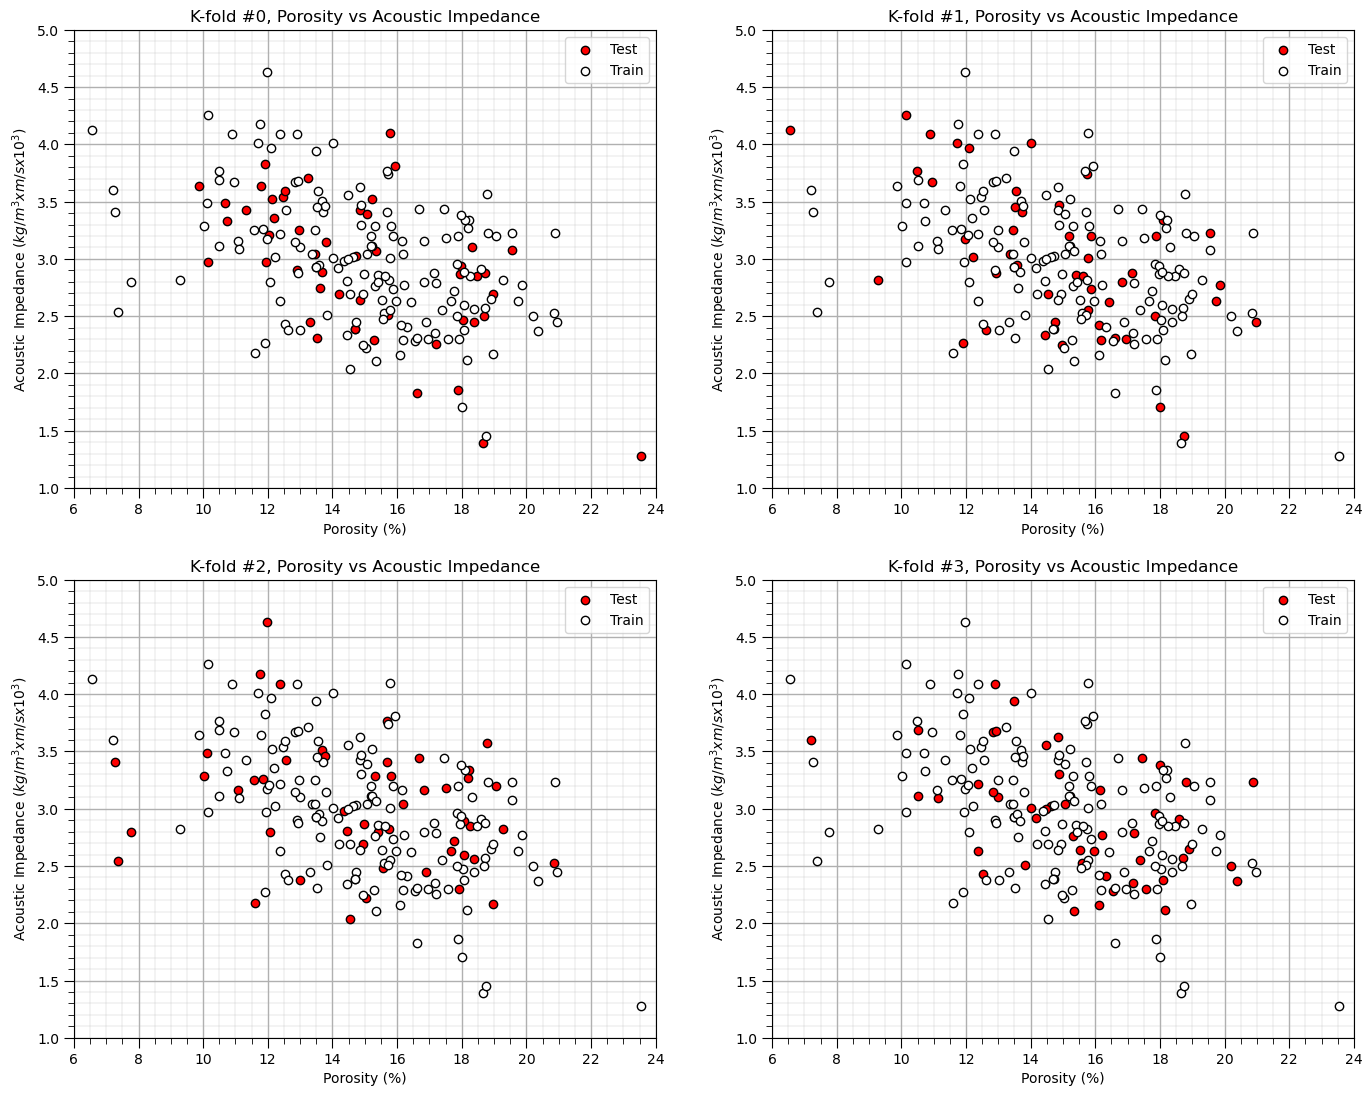

In [190]:
K = 4
kf = KFold(n_splits=K, shuffle=True, random_state=seed)

df['Fold'] = -1
for fold_number, (train_index, test_index) in enumerate(kf.split(df)):
    df.loc[test_index, 'Fold'] = fold_number  # Assign fold number to test set

for k in range(0,K):
    df_in = df[df['Fold'] == k]; df_out = df[df['Fold'] != k]
    plt.subplot(2,2,k+1)
    plt.scatter(df_in[Xname[0]],df_in[Xname[1]],color='red',edgecolor='black',label='Test')
    plt.scatter(df_out[Xname[0]],df_out[Xname[1]],color='white',edgecolor='black',label='Train'); add_grid()
    plt.title('K-fold #' + str(k) + ', ' + Xlabel[0] + ' vs ' +  Xlabel[1])
    plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
    plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Leave-p-out Cross Validation (LpO-CV)

This is the variant of K-fold cross validation that exhaustively samples the full combinatorial of withholding $p$ testing data. 

1. Select $p$, integer number of testing data to withhold

2. For all possible $p$ subsets of $n$,
   
3. Assign the data outside the $p$ as training data and inside the $p$ as testing data

5. Train and test the prediction model and calculated the testing model metric

6. Goto 2
   
7. Aggregate testing model metric over the combinatorial

For this case the combinatorial of cases is, $n$ choose $p$,

$$
\binom{n}{p} = \frac{n!}{p!(n - p)!}
$$

For $n=100$ and $p=20$, we have $5.36 \times 10^{20}$ combinations to check!

#### Limitations of Cross Validation

Here are some additional issues with the model cross validation approach in general,

* **Peeking, Information Leakage** – some information is transmitted from the withheld data into the model, some model decision(s) use all the data. Pipelines and wrappers help with this.

* **Black Swans / Stationarity** – the model cannot be tested for data events not available in the data. This is also known as the ‘No Free Lunch Theorem’ in machine learning

Consider the words of Hume,

"even after the observation of the frequent or constant conjunction of objects, we have no reason to draw any inference concerning any object beyond those of which we have had experience" - Hume (1739–1740)

* We cannot predict things that we have never seen in our data!

here's a quote from the famous Oreskes et al. (1994) paper on subsurface validation and verification,

"Verification and validation of numerical models of natural systems is impossible. This is because natural systems are never closed and because model results are always nonunique. Models can be confirmed by the demonstration of agreement between observation and prediction, but confirmation is inherently partial. Complete confirmation is logically precluded by the fallacy of affirming the consequent and by incomplete access to natural phenomena. Models can only be evaluated in relative terms, and their predictive value is always open to question. The primary value of models is heuristic."
- Oreskes et al. (1994)

all of this is summed up very well with,

‘All models are wrong, but some are useful’ – George Box

and a reminder of,

**Parsimony** – since all models are wrong, an economical description of the system. Occam’s Razor

resulting in a pragmatic approach of,

**Worrying Selectively** – since all models are wrong, figure out what is most importantly wrong.

finally, I add my own words,

‘Be humble, the earth will surprise you!’ – Michael Pyrcz

#### Comments

This was a basic description of machine learning concepts. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this was helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).


#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
